In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Una red de **mundo pequeño** se caracteriza por un valor **bajo** en la longitud de los **caminos más cortos** pero un **alto** coeficiente de **clustering**.

Algunos ejemplos de redes de mundo pequeño en la vida real son:
- [Interacción de proteinas en el metabolismo de las bacterias](https://www.sciencedirect.com/science/article/pii/S0959440X04000776?via%3Dihub)
- La red de aeropuertos en el mundo (se enlazan si tienen vuelos de forma directa)
- La red de actores (se enlazan si aparecen en la misma película)

# Modelo de Strogratz y Watts (1998)

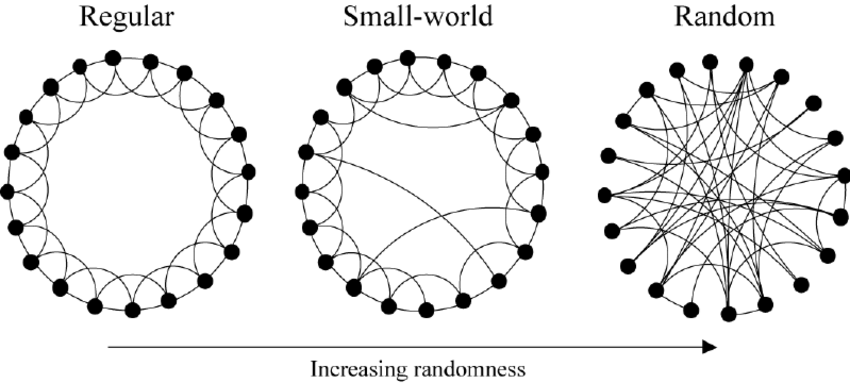

In [ ]:
#Dibujar el grafo
def dibujar(G):
  plt.figure(figsize=(8, 8))
  nx.draw(G,
          pos=nx.circular_layout(grafo_small_world),
          node_size=10,
          node_color='#ff006e',
          edge_color='#8338ec',
          with_labels=False)
  plt.title("Red Small-World de Watts-Strogatz")
  plt.show()

In [ ]:
#Parámetros
num_nodos = 1000
vecinos_cercanos = 10  #Cada nodo se conecta a esta cantidad de vecinos más cercanos
prob_reconexion = 0.1  #Probabilidad de reconectar aristas


grafo_small_world = nx.watts_strogatz_graph(num_nodos, vecinos_cercanos, prob_reconexion)

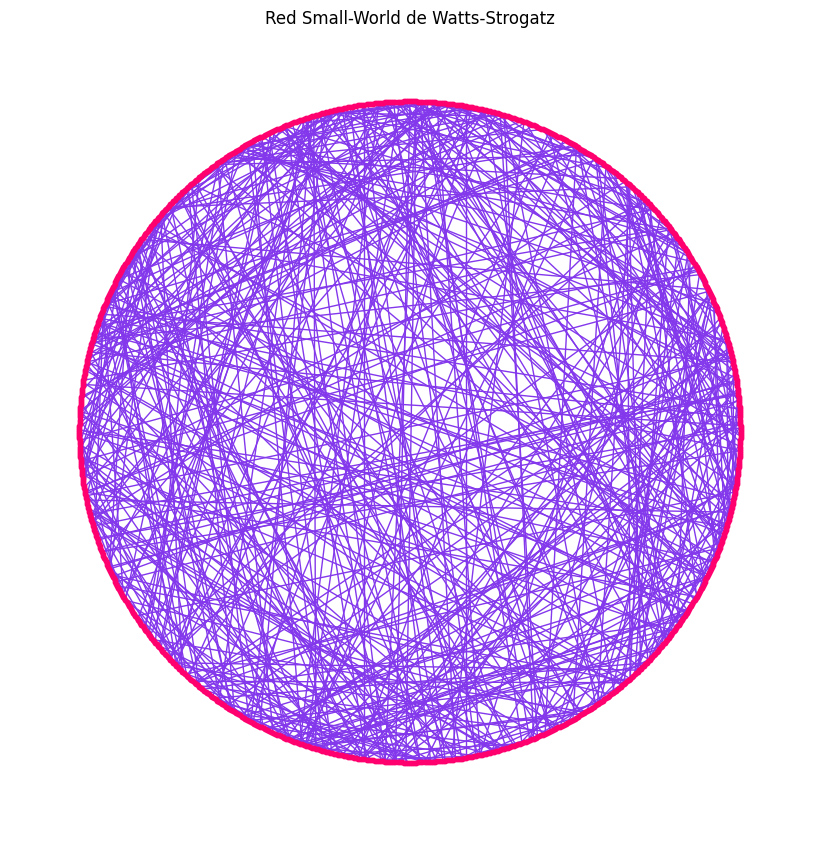

In [ ]:
dibujar(grafo_small_world)

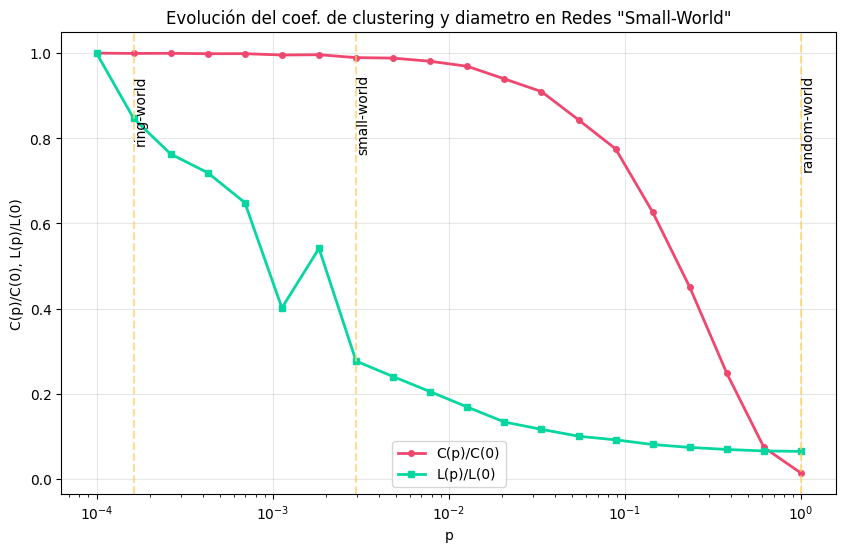

In [ ]:
num_nodos = 1000
vecinos_cercanos = 10
p_values = np.logspace(-4, 0, 20)

#Ring-World
G_referencia = nx.watts_strogatz_graph(num_nodos, vecinos_cercanos, 0)
C_referencia = nx.average_clustering(G_referencia)
L_referencia = nx.average_shortest_path_length(G_referencia)

C_normalizado = []
L_normalizado = []

for i, p in enumerate(p_values):
    G = nx.watts_strogatz_graph(num_nodos, vecinos_cercanos, p)

    C = nx.average_clustering(G)
    L = nx.average_shortest_path_length(G)

    C_normalizado.append(C / C_referencia)
    L_normalizado.append(L / L_referencia)


plt.figure(figsize=(10, 6))

plt.plot(p_values, C_normalizado, 'o-', label='C(p)/C(0)', linewidth=2, color='#ef476f', markersize=4)
plt.plot(p_values, L_normalizado, 's-', label='L(p)/L(0)', linewidth=2, color='#06d6a0', markersize=4)

plt.axvline(x=p_values[1], color='#ffd166', linestyle='--', alpha=0.7)
plt.text(p_values[1], 0.95, 'ring-world', rotation=90, verticalalignment='top')
plt.axvline(x=p_values[7], color='#ffd166', linestyle='--', alpha=0.7)
plt.text(p_values[7], 0.95, 'small-world', rotation=90, verticalalignment='top')
plt.axvline(x=p_values[-1], color='#ffd166', linestyle='--', alpha=0.7)
plt.text(p_values[-1], 0.95, 'random-world', rotation=90, verticalalignment='top')

plt.xscale('log')
plt.xlabel('p')
plt.ylabel('C(p)/C(0), L(p)/L(0)')
plt.title('Evolución del coef. de clustering y diametro en Redes "Small-World"')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Grafica del paper original:

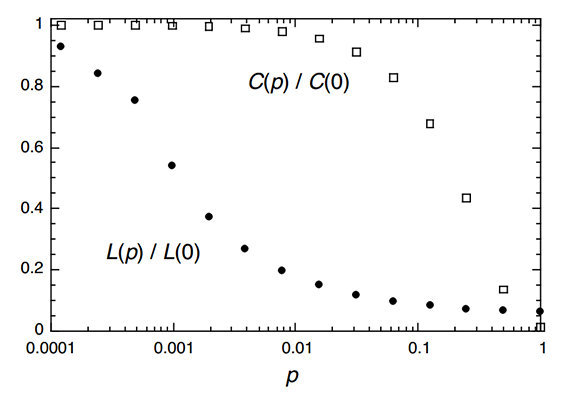

**Teóricamente:**

El **coeficiente de clustering** debería ser:
* $C = \frac{3(k-2)}{4(k-1)} = \frac{3(10-2)}{4(10-1)} = \frac{24}{36} = 0.667$ (ring-world, p=0)
* $C = \frac{k}{n} = \frac{10}{1000} = 0.01$ (aleatoria, p=1)
* Intermedio con $0 < p < 1$, manteniéndose alto para small-world

El **average path length** debería ser:
* $L \approx \frac{n}{2k} = 50$ (ring-world, p=0)  
* $L \approx \frac{\log(n)}{\log(k)} = 3$ (small-world/aleatoria, p>0)

In [ ]:
num_nodos = 1000
vecinos_cercanos = 10
p_values = np.logspace(-4, 0, 20)

def evaluar_metricas(G):
    print(f"""
        Número de nodos: {G.number_of_nodes()}
        Número de aristas: {G.number_of_edges()}
        Average path length: {nx.average_shortest_path_length(G):.3f}
        Clustering global: {nx.average_clustering(G):.3f}""")

# Evaluar para diferentes valores de p
print("=== RING-WORLD (p=0) ===")
G_anillo = nx.watts_strogatz_graph(num_nodos, vecinos_cercanos, 0)
evaluar_metricas(G_anillo)

print("\n=== SMALL-WORLD (p=0.01) ===")
G_smallworld = nx.watts_strogatz_graph(num_nodos, vecinos_cercanos, 0.01)
evaluar_metricas(G_smallworld)

print("\n=== RANDOM-WORLD (p=1) ===")
G_aleatoria = nx.watts_strogatz_graph(num_nodos, vecinos_cercanos, 1.0)
evaluar_metricas(G_aleatoria)

=== RING-WORLD (p=0) ===

        Número de nodos: 1000
        Número de aristas: 5000 
        Average path length: 50.450
        Clustering global: 0.667

=== SMALL-WORLD (p=0.01) ===

        Número de nodos: 1000
        Número de aristas: 5000 
        Average path length: 8.700
        Clustering global: 0.645

=== RANDOM-WORLD (p=1) ===

        Número de nodos: 1000
        Número de aristas: 5000 
        Average path length: 3.270
        Clustering global: 0.010
